In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

        
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import gc

import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amex-default-prediction/sample_submission.csv
/kaggle/input/amex-default-prediction/train_data.csv
/kaggle/input/amex-default-prediction/test_data.csv
/kaggle/input/amex-default-prediction/train_labels.csv
/kaggle/input/amexfeather/test_data_f32.ftr
/kaggle/input/amexfeather/train_data.ftr
/kaggle/input/amexfeather/train_data_f32.ftr
/kaggle/input/amexfeather/test_data.ftr


# **Read Data**
The dataset of this competition has a huge size. If you're reading raw CSV files, It will create a out of memory error. That's why we read the data from AMEX-Feather-Dataset.

In [3]:
train_dataset_ = pd.read_feather('../input/amexfeather/train_data.ftr')
# Keep the latest statement features for each customer
train_dataset = train_dataset_.groupby('customer_ID').tail(1).set_index('customer_ID', drop=True).sort_index()

In [4]:
del train_dataset_
gc.collect()

53

In [5]:
train_dataset.head()

,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,D_49,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,D_53,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,D_56,B_13,R_5,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_63,D_64,D_65,B_16,B_17,B_18,B_19,D_66,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,D_73,P_4,D_74,D_75,D_76,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,R_9,S_16,D_80,R_10,R_11,B_27,D_81,D_82,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_29,B_30,S_18,D_86,D_87,R_17,R_18,D_88,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_105,D_106,D_107,B_36,B_37,R_26,R_27,B_38,D_108,D_109,D_110,D_111,B_39,D_112,B_40,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,B_42,D_130,D_131,D_132,D_133,R_28,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
customer_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,2018-03-13,0.934570,0.009117,0.009384,1.007812,0.006104,0.135010,0.001604,0.007175,NaN,NaN,0.003258,0.070801,0.740234,0.231689,0.008308,0.420410,0.539551,0.192383,NaN,0.149536,0.058411,0.002928,0.153442,0.673340,0.009537,0.000085,0.203491,0.629395,0.326172,NaN,0.034637,0.010262,0.001770,1.007812,0.008514,0.105652,0.112305,0.488281,0.187256,0.166626,0.100098,0.009445,0.007175,0.007397,0.010239,0.063477,0.258545,0.227661,0.014549,0.402344,0.446533,CR,O,0.008659,0.006409,NaN,1.007812,0.005276,NaN,0.007629,6.0,0.184082,0.003944,0.686523,0.005375,0.005470,0.008049,0.008255,0.377930,0.006969,0.304688,0.040375,NaN,0.006565,0.001299,0.001352,NaN,0.002230,0.009163,0.421387,0.006474,0.001067,0.000747,0.002193,0.006344,NaN,0.000026,0.208252,0.001058,0.009354,0.007236,0.009178,0.507324,0.006550,1.001953,0.084717,0.006100,0.000013,0.002901,0.001116,0.001910,0.003256,NaN,0.0,0.001277,0.009972,NaN,0.002331,0.002518,NaN,1.0,0.003511,0.008102,0.007645,0.009415,0.006355,0.008499,1.007812,0.004639,0.001445,0.003080,1.005859,0.003641,0.004639,0.003866,0.005909,0.005459,0.001190,0.917969,0.131836,0.936035,0.972168,0.001281,0.943359,1.002930,1.014648,1.074219,NaN,0.671875,0.007442,0.008675,NaN,1.005859,2.0,NaN,0.000226,NaN,NaN,NaN,1.009766,0.100464,0.928711,0.003658,1.0,0.255859,0.0,4.0,0.260254,0.256592,0.0,0.719727,0.433838,0.003580,0.685059,0.008400,1.0,1.008789,0.999512,1.008789,0.003975,NaN,0.004185,0.005703,NaN,0.006210,0.002716,NaN,NaN,NaN,NaN,NaN,0.007187,0.004234,0.005085,NaN,0.005810,0.002970,0.008530,0
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5,2018-03-25,0.880371,0.178101,0.034698,1.003906,0.006912,0.165527,0.005550,0.005070,NaN,0.060638,0.008781,0.020630,0.266357,0.026993,0.004978,0.438721,0.402100,0.014694,NaN,0.167603,0.028412,0.000974,NaN,0.339600,0.012924,0.102051,0.242310,0.570801,0.297119,NaN,0.043915,0.014572,0.002911,1.002930,0.003283,0.208496,0.019043,0.406494,0.036102,0.748535,0.017685,0.005878,0.009758,0.127808,0.018661,0.212524,0.412109,0.048981,0.009537,0.363770,0.234009,CO,O,0.008743,0.002939,NaN,1.003906,0.008049,NaN,0.004318,6.0,0.192383,0.007744,0.287109,0.006191,0.007637,0.006172,0.000883,0.007637,0.001278,0.304688,0.014702,NaN,0.004658,0.007927,0.009598,NaN,0.002382,0.008255,0.227783,0.021149,0.000182,0.001541,0.009117,0.006893,NaN,0.006931,0.002119,0.002045,0.009666,0.005375,0.005009,NaN,0.005413,1.008789,0.019669,0.006195,0.005371,0.006271,0.009911,0.000983,0.006668,NaN,0.0,0.009300,0.006462,NaN,0.006504,0.007053,NaN,1.0,0.005089,0.001838,0.008644,0.009468,0.003500,0.000473,1.000977,0.004864,0.000906,0.003830,0.009163,0.004642,0.000195,0.000523,0.006420,0.004974,0.002398,0.920898,0.132812,0.930664,0.977539,0.003212,0.001621,0.008949,0.004364,NaN,NaN,0.007774,0.007458,0.032898,NaN,1

In [6]:
train_dataset.info(max_cols=191,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 458913 entries, 0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a to fffff1d38b785cef84adeace64f8f83db3a0c31e8d92eaba8b115f71cab04681
Data columns (total 190 columns):
 #    Column  Non-Null Count   Dtype         
---   ------  --------------   -----         
 0    S_2     458913 non-null  datetime64[ns]
 1    P_2     455944 non-null  float16       
 2    D_39    458913 non-null  float16       
 3    B_1     458913 non-null  float16       
 4    B_2     458882 non-null  float16       
 5    R_1     458913 non-null  float16       
 6    S_3     373943 non-null  float16       
 7    D_41    458882 non-null  float16       
 8    B_3     458882 non-null  float16       
 9    D_42    59910 non-null   float16       
 10   D_43    324591 non-null  float16       
 11   D_44    436618 non-null  float16       
 12   B_4     458913 non-null  float16       
 13   D_45    458882 non-null  float16       
 14   B_5     458913 non-null  float

In [7]:
train_dataset.describe()

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,D_49,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,D_53,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,D_56,B_13,R_5,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_65,B_16,B_17,B_18,B_19,B_20,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,D_73,P_4,D_74,D_75,D_76,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,R_9,S_16,D_80,R_10,R_11,B_27,D_81,D_82,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_29,S_18,D_86,D_87,R_17,R_18,D_88,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_105,D_106,D_107,B_36,B_37,R_26,R_27,D_108,D_109,D_110,D_111,B_39,D_112,B_40,S_27,D_113,D_115,D_118,D_119,D_121,D_122,D_123,D_124,D_125,D_127,D_128,D_129,B_41,B_42,D_130,D_131,D_132,D_133,R_28,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
count,455944.000000,4.589130e+05,458913.000000,4.588820e+05,4.589130e+05,373943.000000,4.588820e+05,4.588820e+05,59910.000000,324591.000000,436618.000000,4.589130e+05,458882.000000,4.589130e+05,458913.000000,363790.000000,458913.000000,400921.000000,51763.000000,458873.000000,458913.000000,454822.000000,196678.000000,458913.000000,4.589130e+05,458913.000000,457673.000000,436693.000000,458913.000000,1.329810e+05,458913.000000,4.589130e+05,458913.000000,458882.000000,458913.000000,373943.000000,4.589130e+05,458913.000000,428536.000000,214179.000000,4.573500e+05,4.589130e+05,4.589130e+05,2.750550e+05,458913.000000,454827.000000,4.589130e+05,410565.000000,458301.000000,458913.000000,399960.000000,4.589130e+05,4.588820e+05,2.144420e+05,4.589130e+05,4.588820e+05,458882.000000,458913.000000,458913.000000,458913.000000,458913.000000,452548.000000,458882.000000,454717.000000,4.589130e+05,457697.000000,458913.000000,4.589130e+05,4239.000000,458913.000000,4.572120e+05,4.589130e+05,49316.000000,4.589130e+05,458913.000000,245076.000000,458301.000000,458882.000000,4.366180e+05,456118.000000,4.589130e+05,26953.000000,458913.000000,457212.000000,458913.000000,4.589130e+05,458882.000000,457723.000000,115618.000000,458913.000000,458913.000000,458913.000000,458913.000000,452548.000000,458913.000000,458913.000000,457673.000000,4.589130e+05,2.732400e+04,458913.000000,458913.000000,645.0,458913.000000,458913.000000,827.000000,458913.0,4.589130e+05,458913.000000,458913.000000,458913.000000,4.589130e+05,458913.000000,458882.000000,457673.000000,458913.000000,4.589130e+05,446106.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,458913.000000,457146.000000,458869.000000,457179.000000,457492.000000,4.589130e+05,4.589130e+05,456083.000000,456083.000000,213311.000000,5.164800e+04,4.560830e+05,458913.000000,458913.000000,5.114300e+04,430177.000000,2627.000000,458882.000000,3678.000000,3678.000000,4105.000000,4.588820e+05,4.589130e+05,3.417470e+05,4.528960e+05,452896.000000,452896.000000,452896.000000,452896.000000,452896.000000,452896.000000,452896.000000,4.528960e+05,458913.000000,456083.000000,4.560830e+05,458913.000000,6142.000000,4.560830e+05,456083.000000,51760.000000,458913.000000,4.589130e+05,16395.000000,1.639500e+04,16395.000000,1.639500e+04,1.639500e+04,456083.000000,458913.000000,4.560830e+05,80315.000000,456083.000000,458913.000000,456083.000000,458913.000000
mean,NaN,NaN,0.000000,NaN,0.000000e+00,NaN,0.000000e+00,NaN,0.177979,0.000000,0.000000,NaN,NaN,0.000000e+00,0.000000,NaN,NaN,NaN,0.191162,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000,0.000000e+00,NaN,NaN,0.000000,NaN,0.000000e+00,NaN,NaN,0.000000,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,0.000000,0.000000,0.000000e+00,0.000000,NaN,NaN,0.170654,0.000000,NaN,NaN,0.143066,0.000000e+00,NaN,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.252930,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.

# Categorical/ Non-Categorical

In [8]:
categorical_cols = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']

num_cols = [col for col in train_dataset.columns if col not in categorical_cols + ["target"]]

print(f'Total number of features: {1}')
print(f'Total number of categorical features: {len(categorical_cols)}')
print(f'Total number of continuos features: {len(num_cols)}')

Total number of features: 1
Total number of categorical features: 11
Total number of continuos features: 178


# Plots

<AxesSubplot:xlabel='target', ylabel='count'>

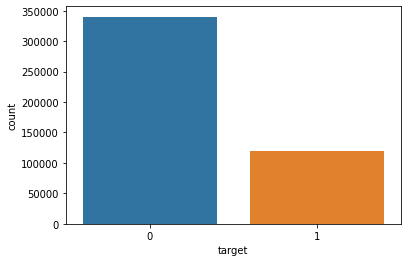

In [9]:
sns.countplot(x = 'target', data = train_dataset)

**Categorical Data Visualize**

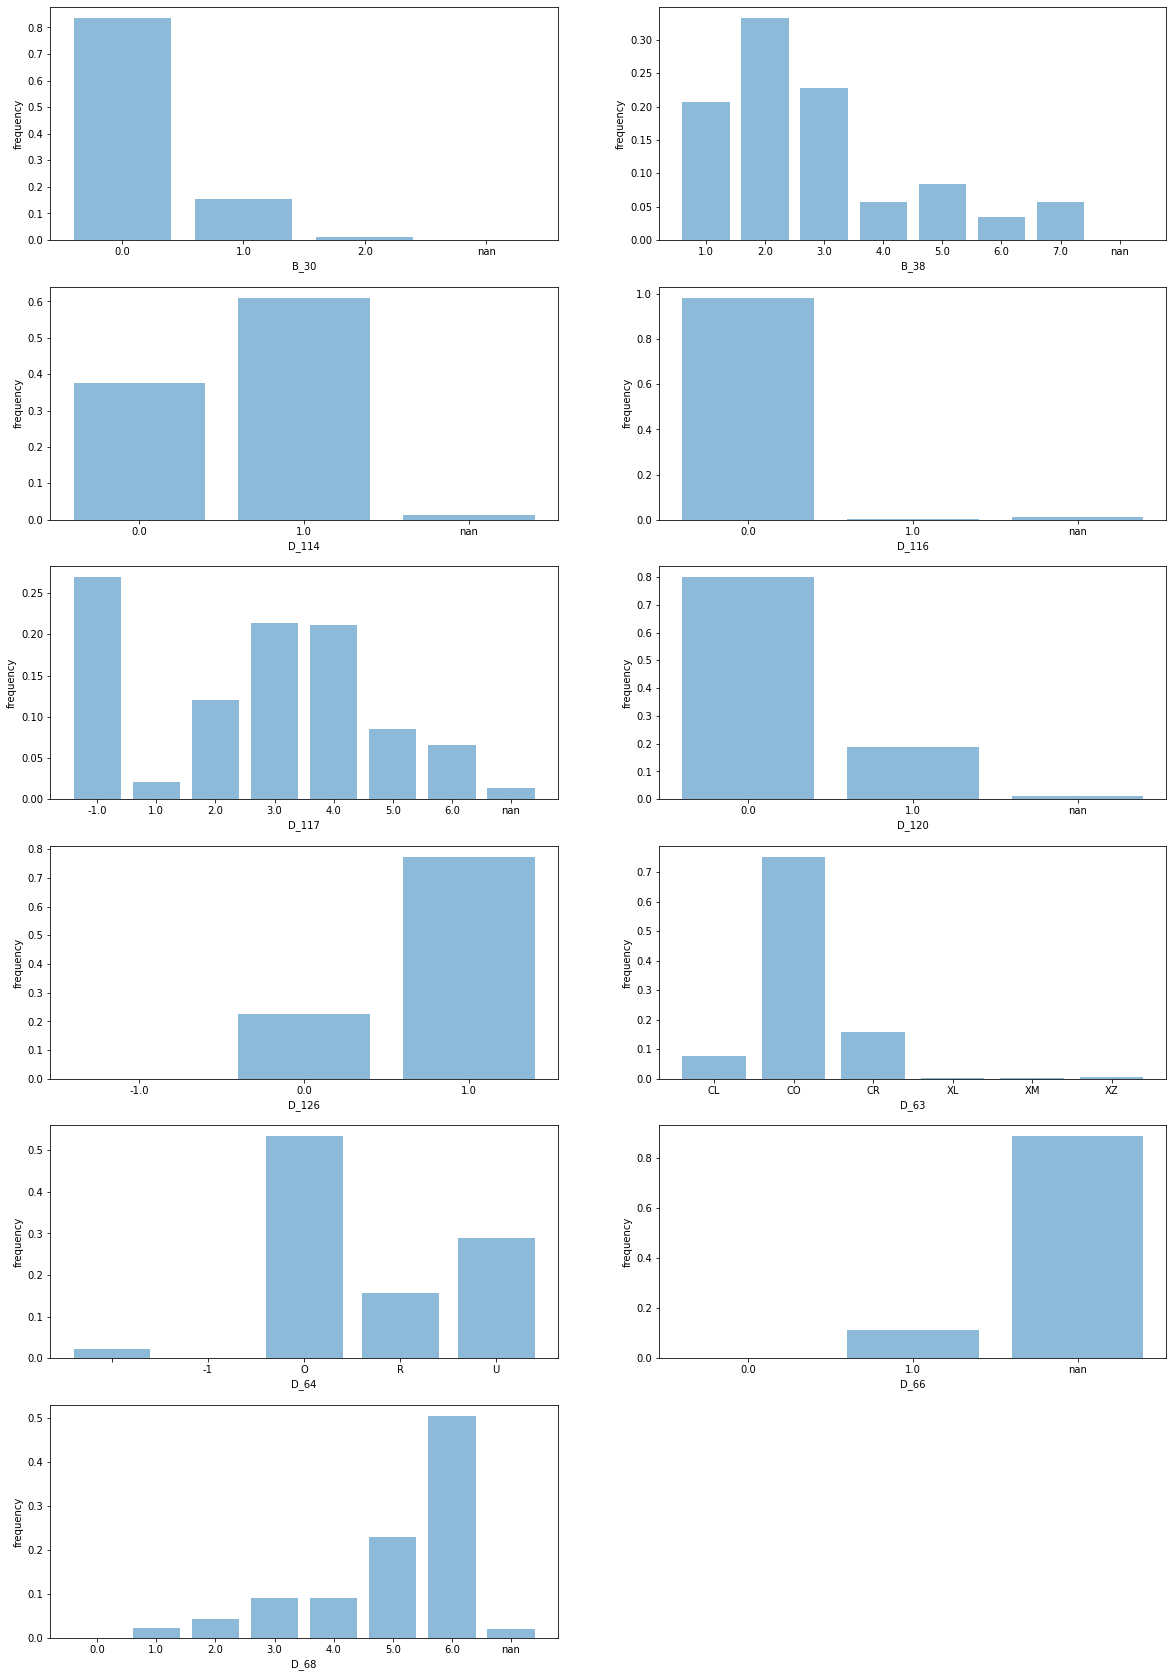

In [10]:
plt.figure(figsize=(20, 30))
for i, k in enumerate(categorical_cols):
    plt.subplot(6, 2, i+1)
    temp_val = pd.DataFrame(train_dataset[k].value_counts(dropna=False, normalize=True).sort_index().rename('count'))
    temp_val.index.name = 'value'
    temp_val.reset_index(inplace=True)
    plt.bar(temp_val.index, temp_val['count'], alpha=0.5)
    plt.xlabel(k)
    plt.ylabel('frequency')
    plt.xticks(temp_val.index, temp_val.value)
plt.show()

**Visualizing categorial features based on the target**

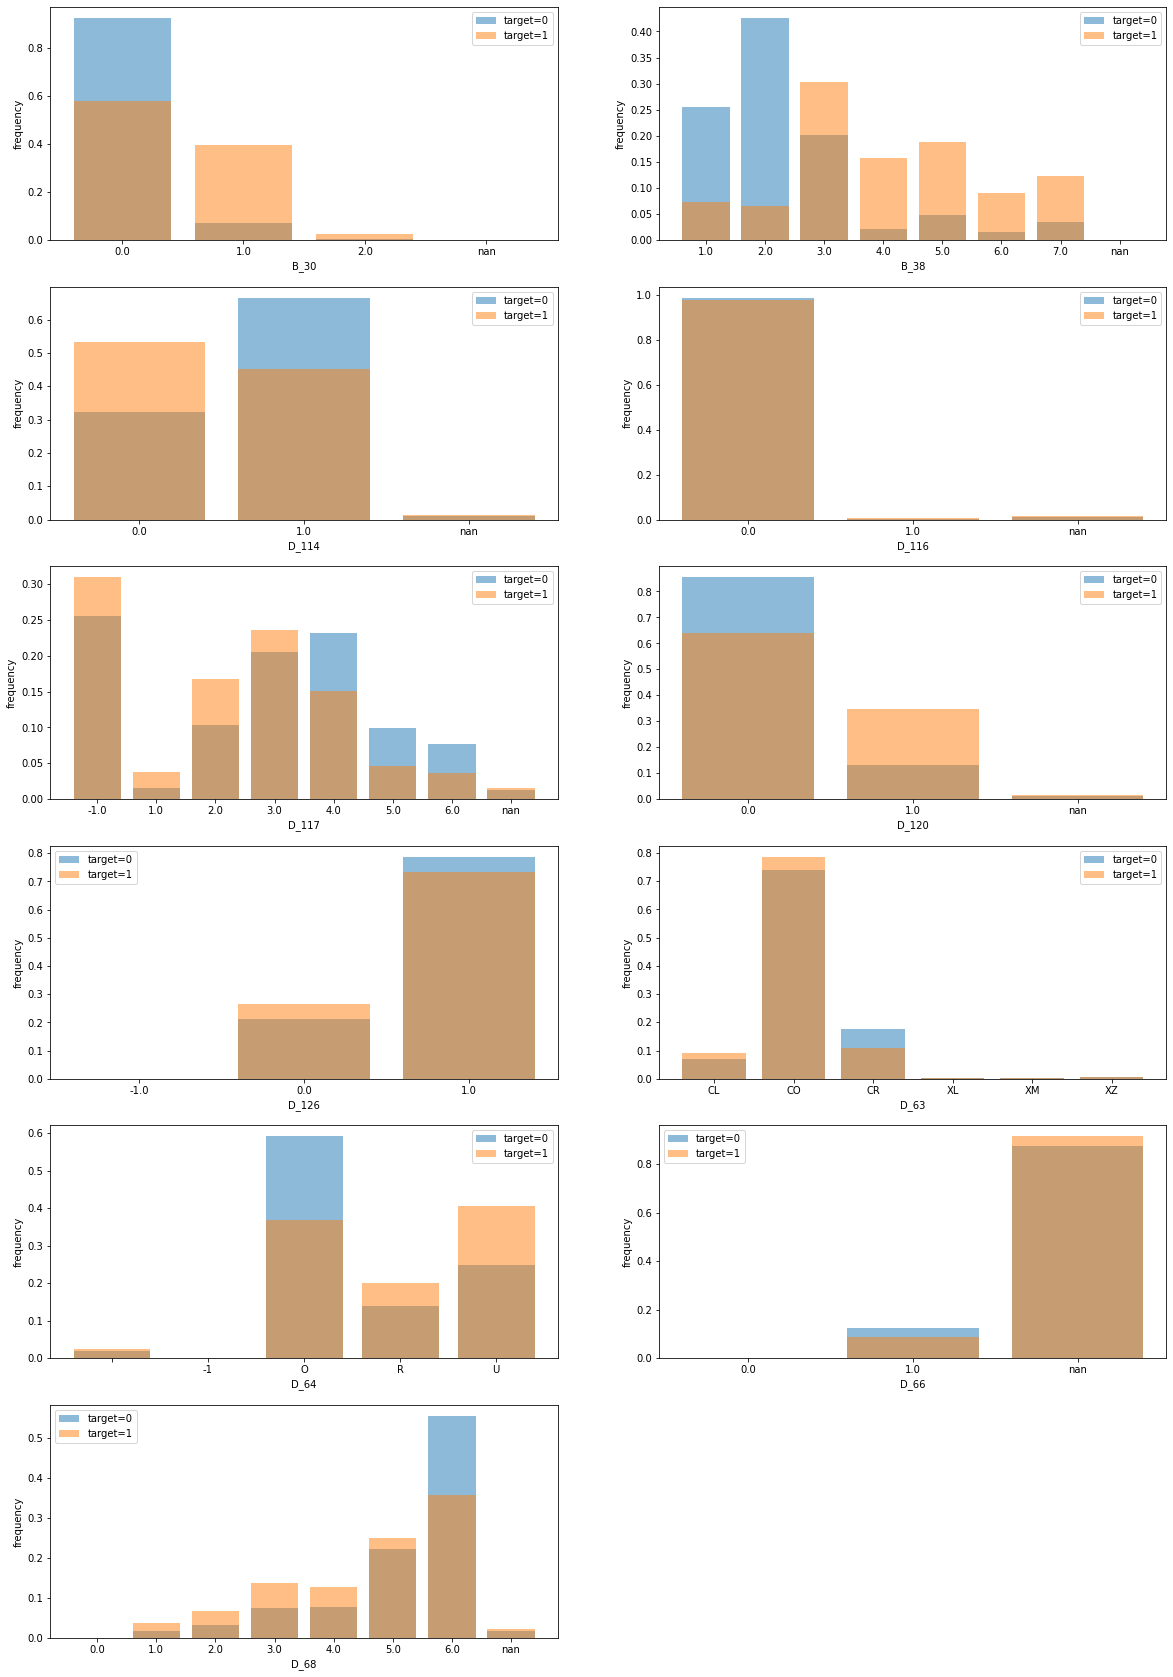

In [11]:
plt.figure(figsize=(20, 30))
for i, f in enumerate(categorical_cols):
    plt.subplot(6, 2, i+1)
    temp = pd.DataFrame(train_dataset[f][train_dataset.target == 0].value_counts(dropna=False, normalize=True).sort_index().rename('count'))
    temp.index.name = 'value'
    temp.reset_index(inplace=True)
    plt.bar(temp.index, temp['count'], alpha=0.5, label='target=0')
    temp = pd.DataFrame(train_dataset[f][train_dataset.target == 1].value_counts(dropna=False, normalize=True).sort_index().rename('count'))
    temp.index.name = 'value'
    temp.reset_index(inplace=True)
    plt.bar(temp.index, temp['count'], alpha=0.5, label='target=1')
    plt.xlabel(f)
    plt.ylabel('frequency')
    plt.legend()
    plt.xticks(temp.index, temp.value)
plt.show()

**Visualizing continuous features**

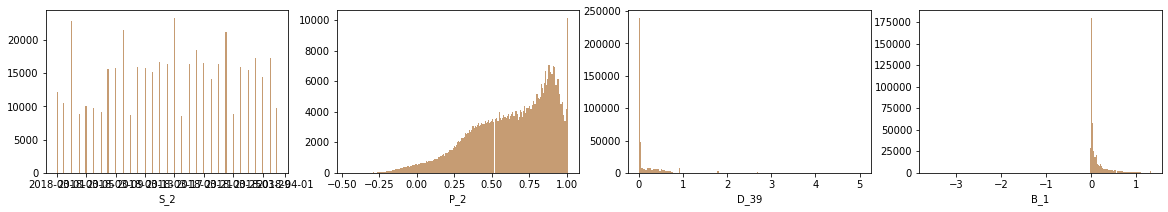

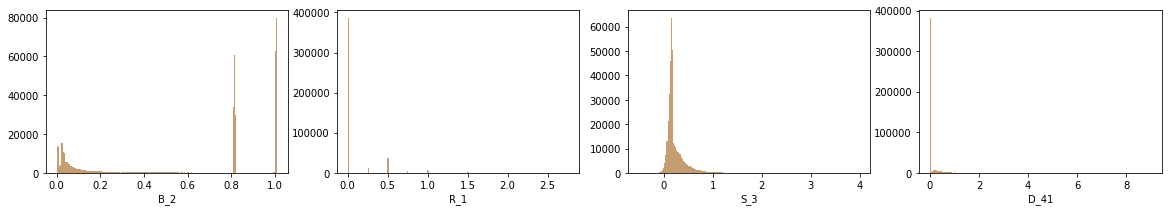

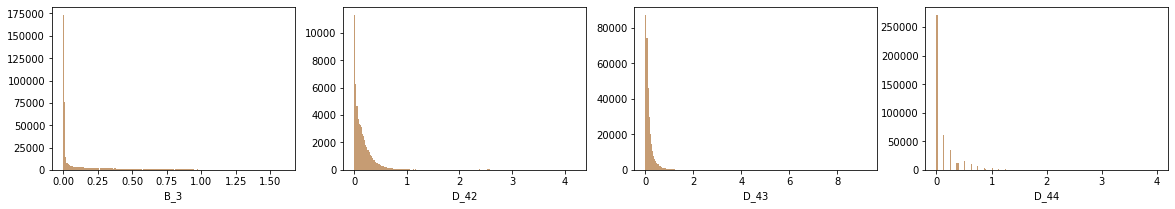

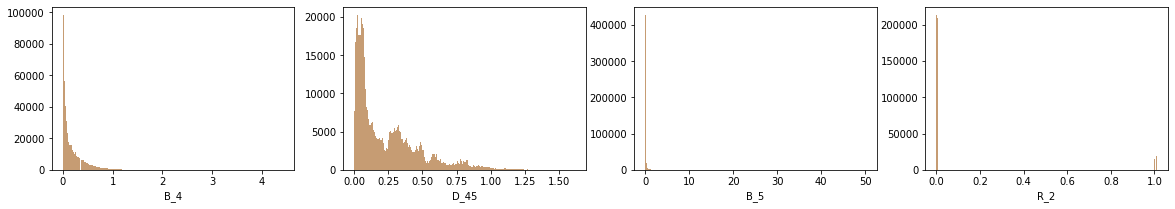

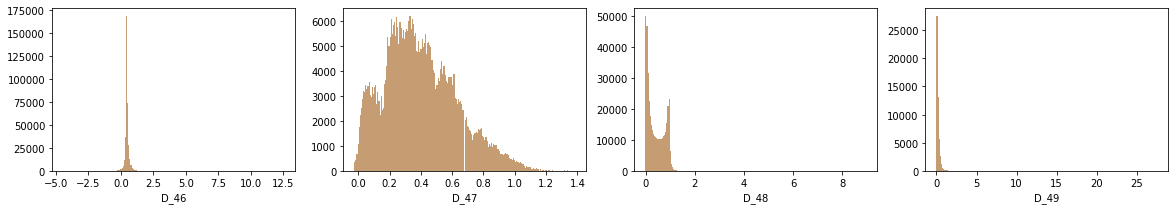

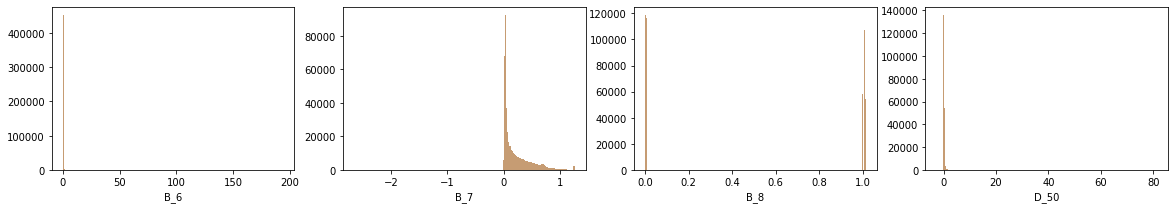

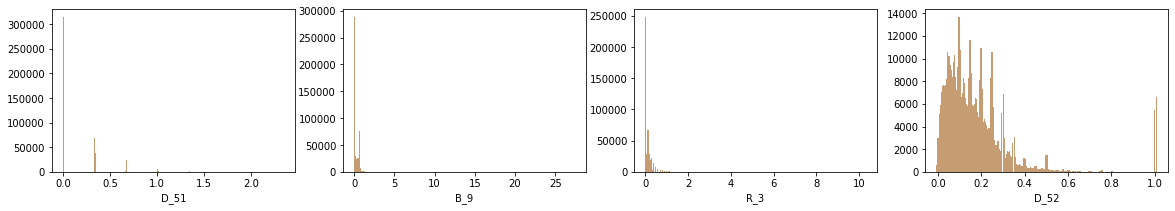

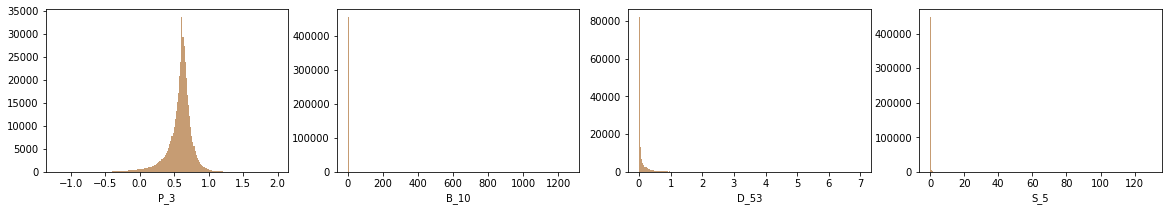

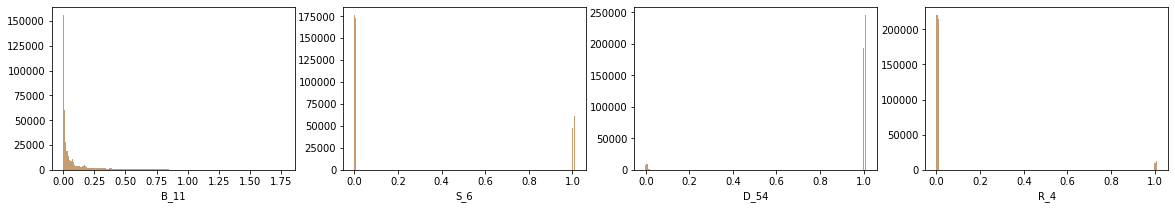

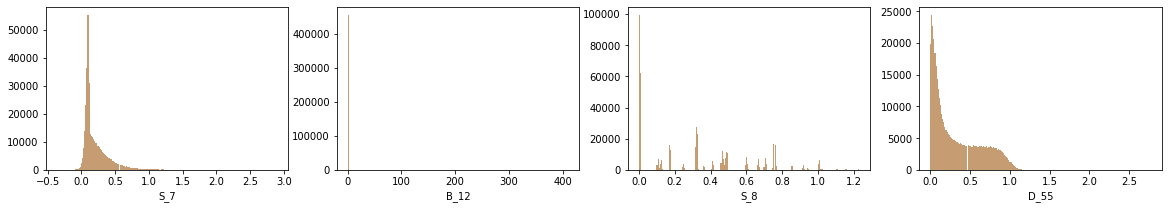

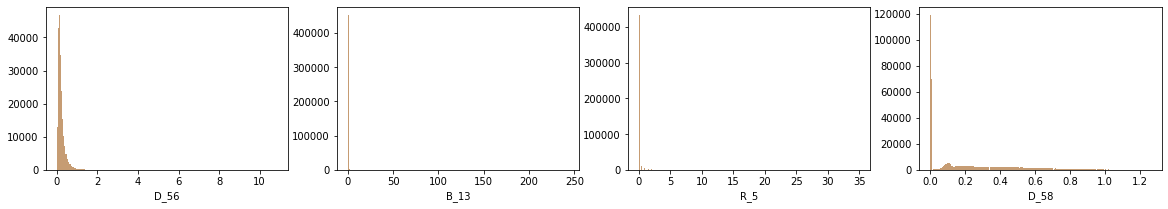

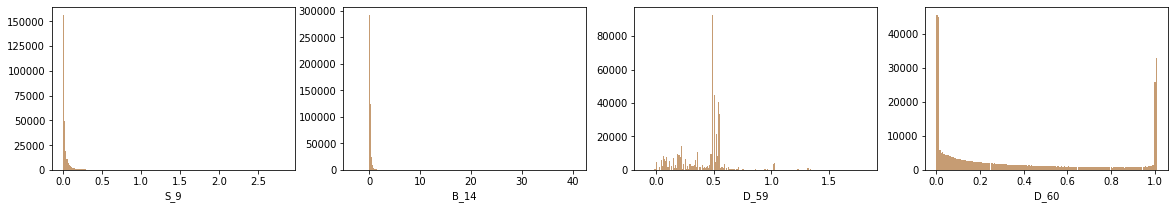

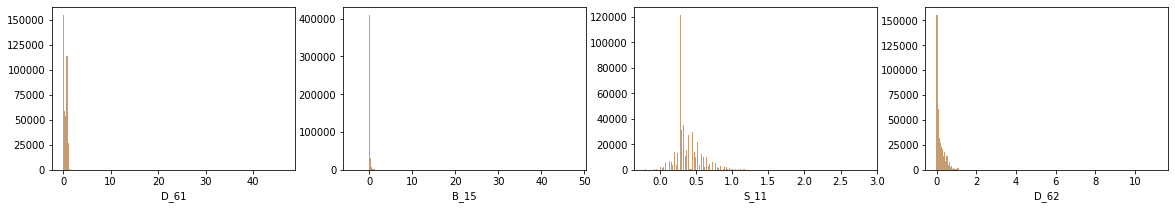

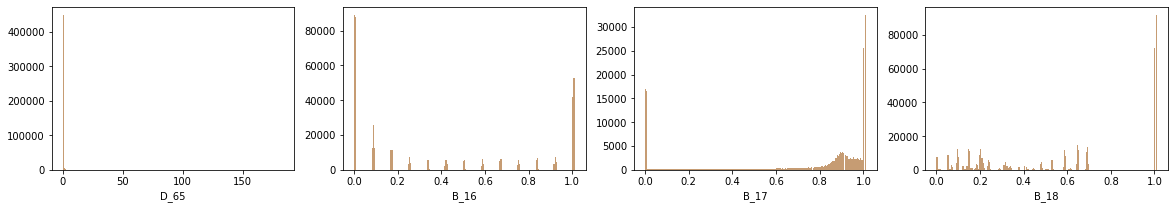

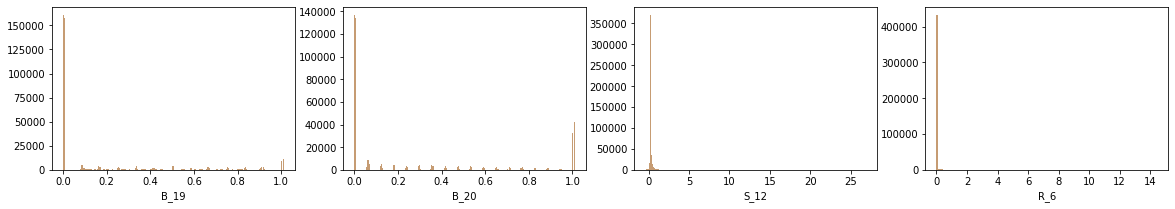

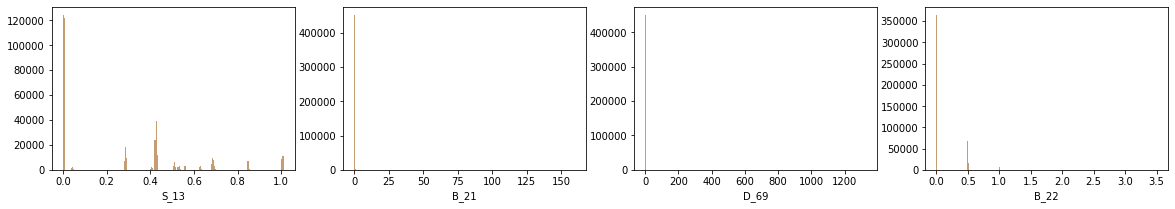

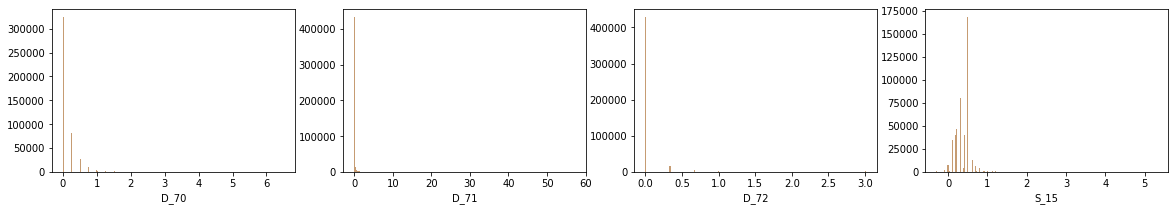

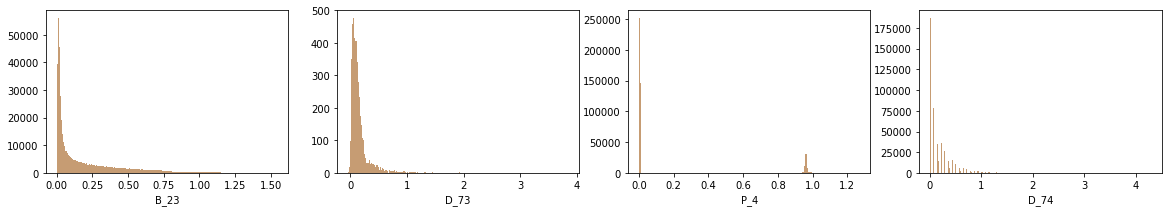

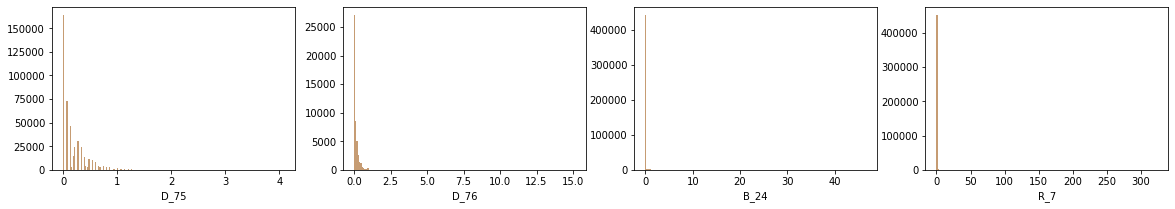

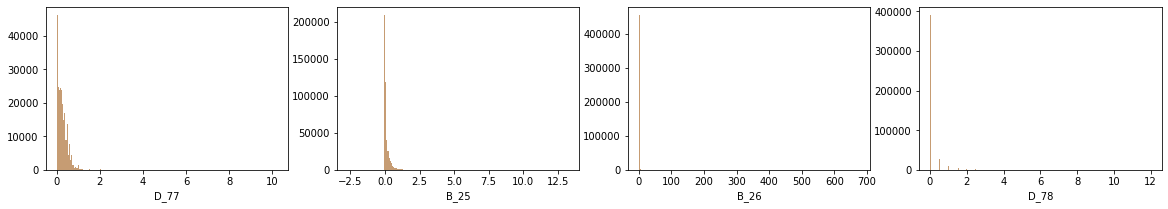

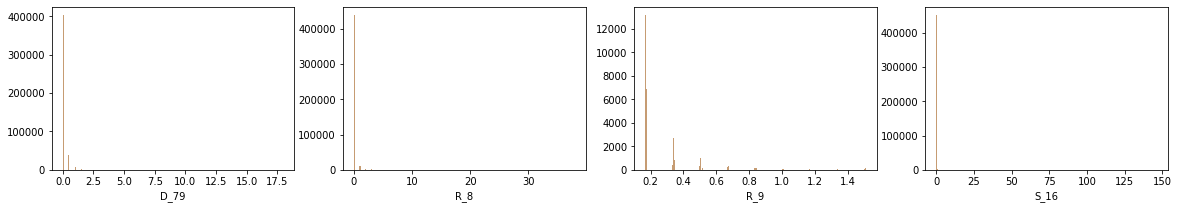

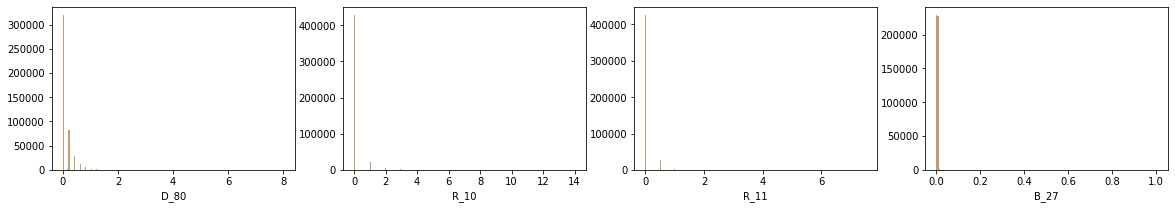

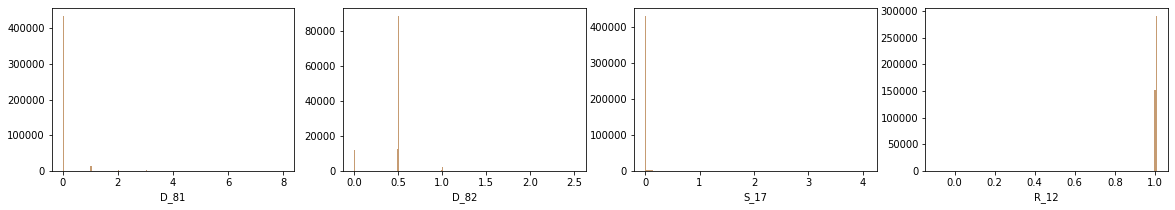

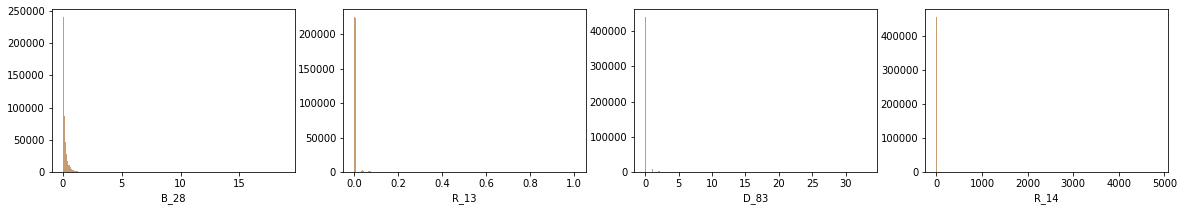

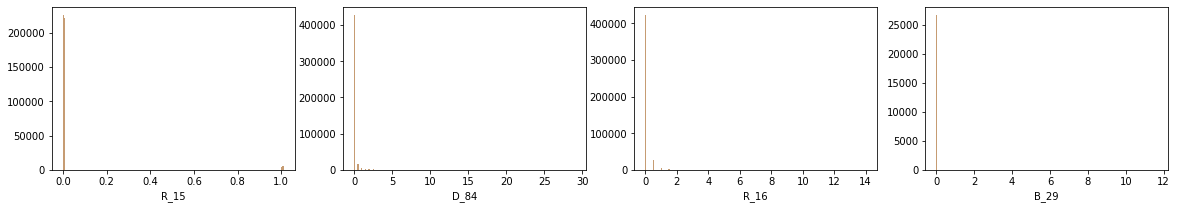

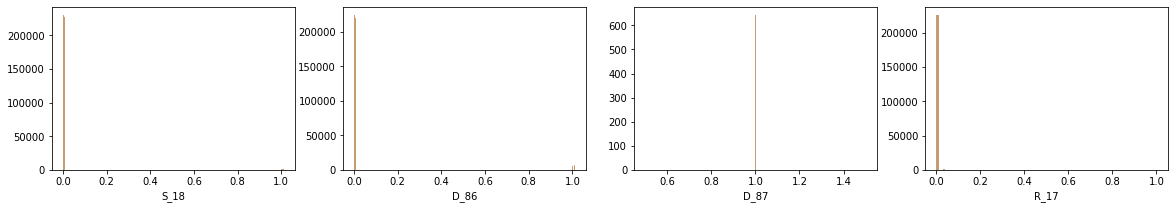

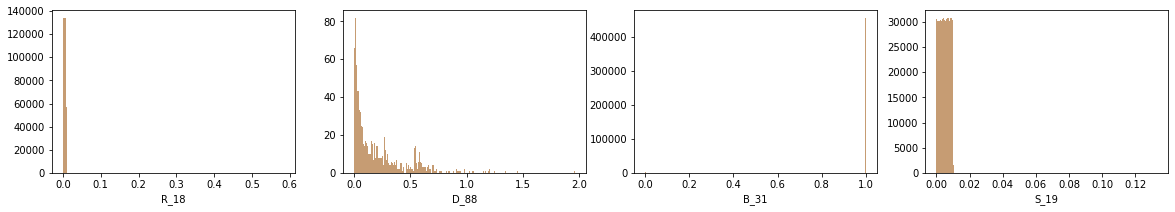

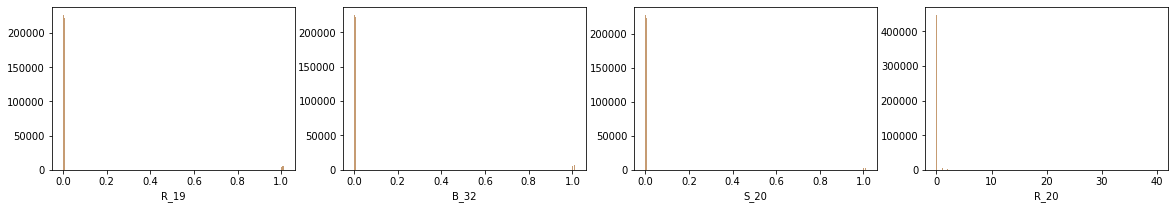

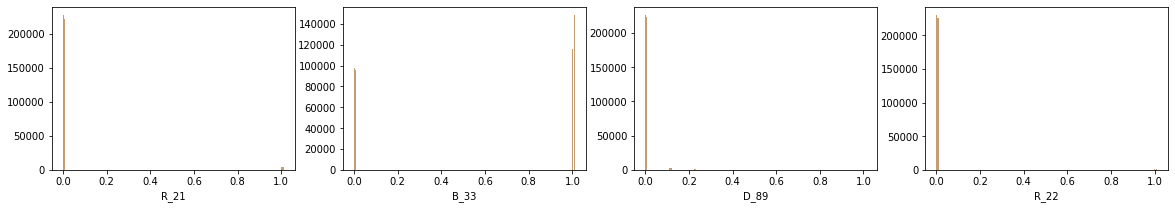

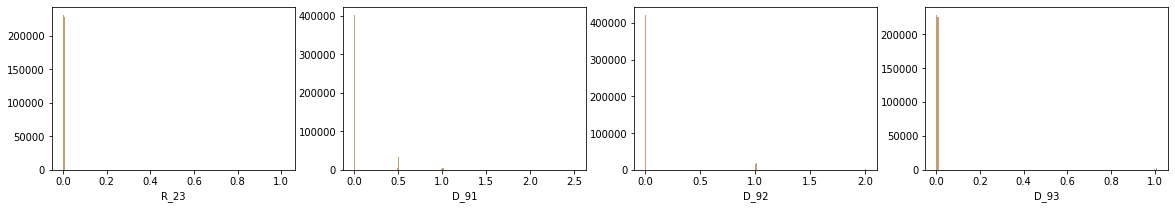

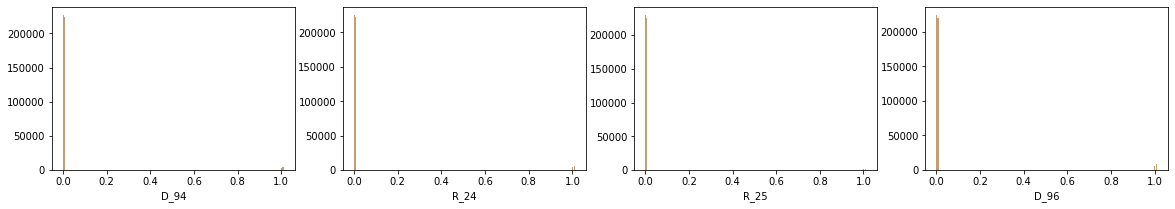

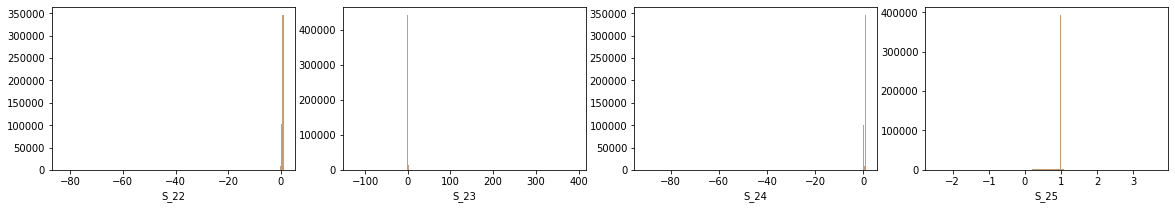

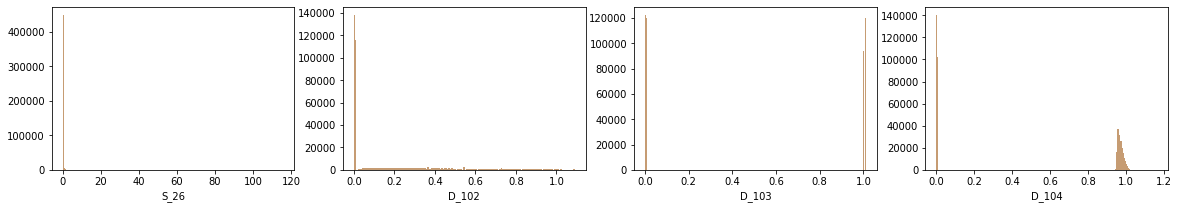

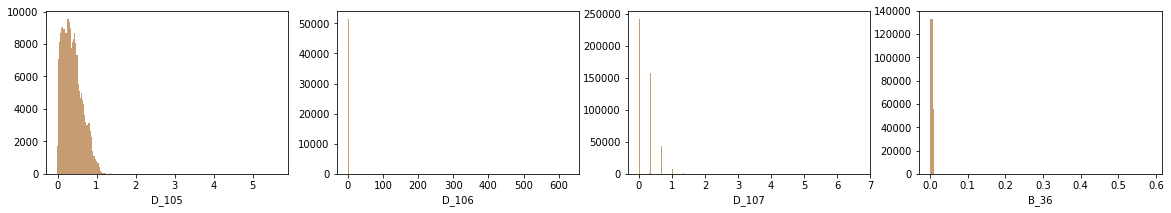

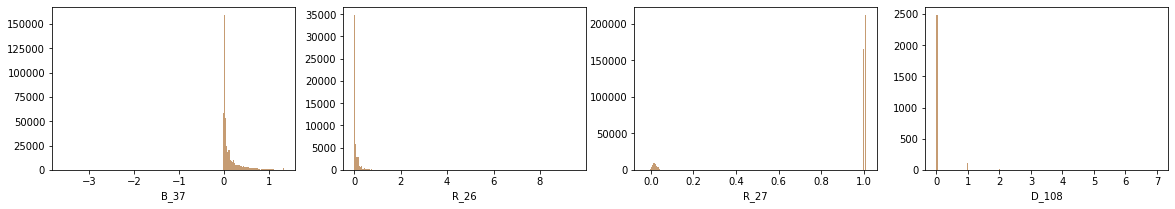

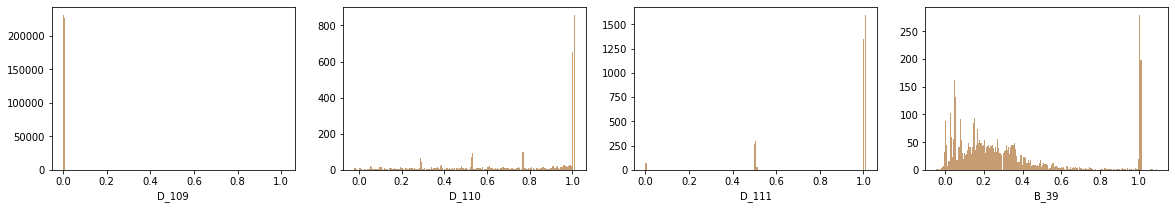

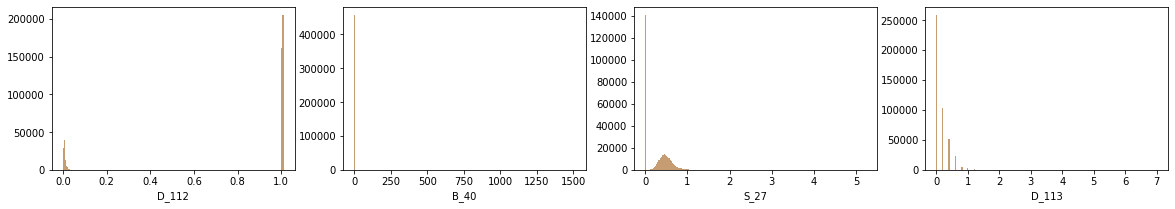

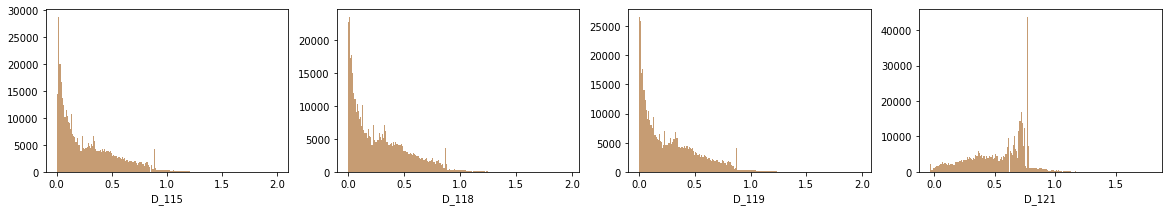

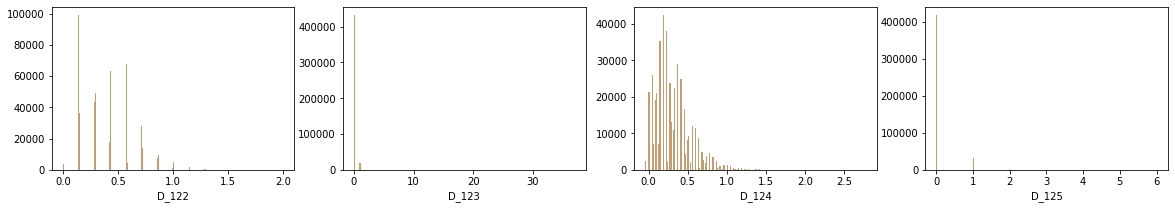

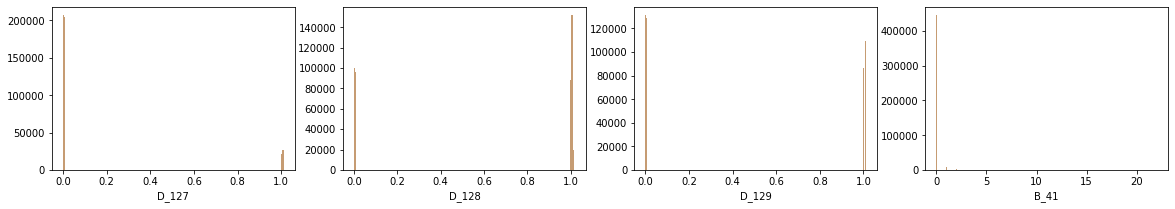

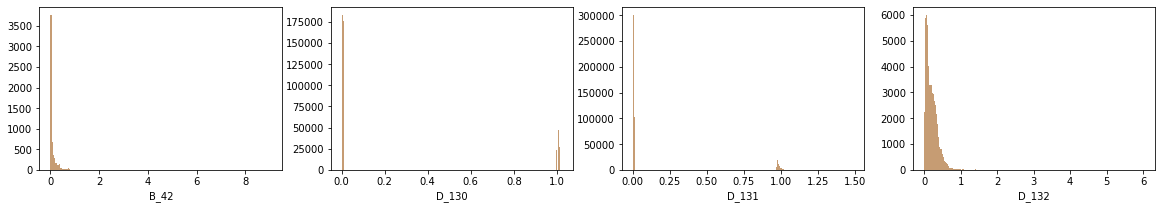

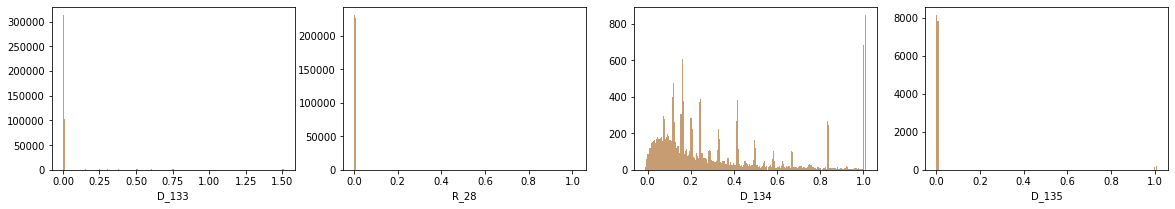

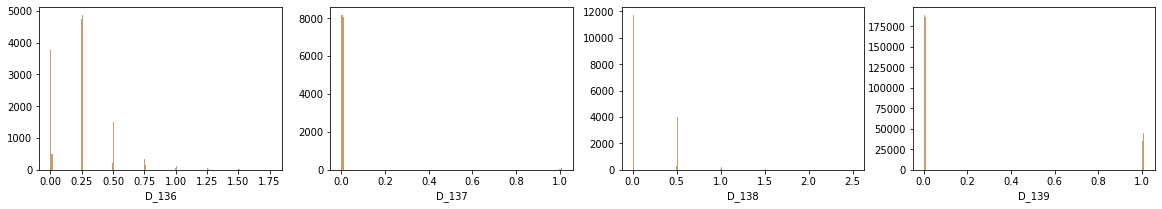

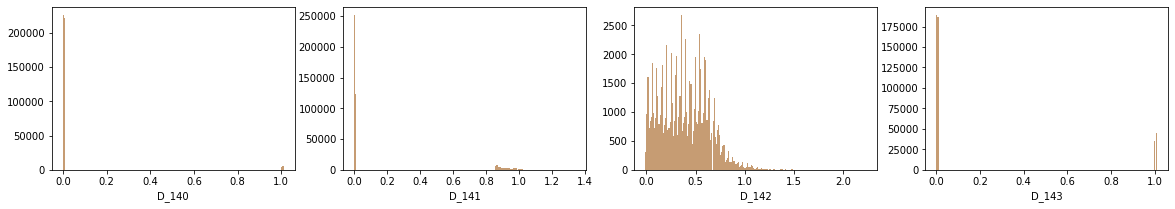

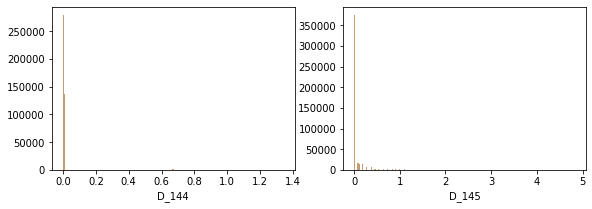

In [12]:
for i, l in enumerate(num_cols):
    if i % 4 == 0: 
        if i > 0: plt.show()
        plt.figure(figsize=(20, 3))
    plt.subplot(1, 4, i % 4 + 1)
    plt.hist(train_dataset[l], bins=200, color='#C69C73')
    plt.xlabel(l)
plt.show()

**Visualize features depend on general categories**

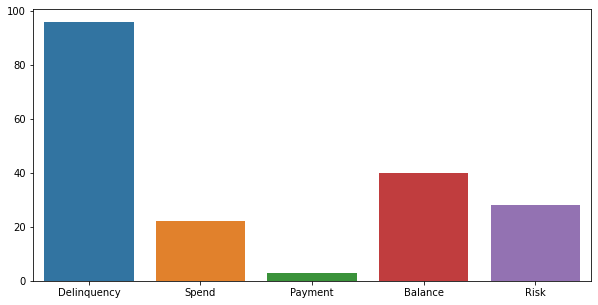

In [13]:
Delinquency = [d for d in train_dataset.columns if d.startswith('D_')]
Spend = [s for s in train_dataset.columns if s.startswith('S_')]
Payment = [p for p in train_dataset.columns if p.startswith('P_')]
Balance = [b for b in train_dataset.columns if b.startswith('B_')]
Risk = [r for r in train_dataset.columns if r.startswith('R_')]
Dict = {'Delinquency': len(Delinquency), 'Spend': len(Spend), 'Payment': len(Payment), 'Balance': len(Balance), 'Risk': len(Risk),}

plt.figure(figsize=(10,5))
sns.barplot(x=list(Dict.keys()), y=list(Dict.values()));

# Drop and Fill Null Values

In [14]:
NaN_Val = np.array(train_dataset.isnull().sum())
NaN_prec = np.array((train_dataset.isnull().sum() * 100 / len(train_dataset)).round(2))
NaN_Col = pd.DataFrame([np.array(list(train_dataset.columns)).T,NaN_Val.T,NaN_prec.T,np.array(list(train_dataset.dtypes)).T], index=['Features','Num of Missing values','Percentage','DataType']
).transpose()
pd.set_option('display.max_rows', None)
NaN_Col

,Features,Num of Missing values,Percentage,DataType
0,S_2,0,0.0,datetime64[ns]
1,P_2,2969,0.65,float16
2,D_39,0,0.0,float16
3,B_1,0,0.0,float16
4,B_2,31,0.01,float16
5,R_1,0,0.0,float16
6,S_3,84970,18.52,float16
7,D_41,31,0.01,float16
8,B_3,31,0.01,float16
9,D_42,399003,86.95,float16


**Drop unuseful columns**

Remove columns if there are > 80% of missing values

In [15]:
train_dataset = train_dataset.drop(['S_2','D_66','D_42','D_49','D_73','D_76','R_9','B_29','D_87','D_88','D_106','R_26','D_108','D_110','D_111','B_39','B_42','D_132','D_134','D_135','D_136','D_137','D_138','D_142'], axis=1)

**Fill null values**

In [16]:
selected_col = np.array(['P_2','S_3','B_2','D_41','D_43','B_3','D_44','D_45','D_46','D_48','D_50','D_53','S_7','D_56','S_9','B_6','B_8','D_52','P_3','D_54','D_55','B_13','D_59','D_61','B_15','D_62','B_16','B_17','D_77','B_19','B_20','D_69','B_22','D_70','D_72','D_74','R_7','B_25','B_26','D_78','D_79','D_80','B_27','D_81','R_12','D_82','D_105','S_27','D_83','R_14','D_84','D_86','R_20','B_33','D_89','D_91','S_22','S_23','S_24','S_25','S_26','D_102','D_103','D_104','D_107','B_37','R_27','D_109','D_112','B_40','D_113','D_115','D_118','D_119','D_121','D_122','D_123','D_124','D_125','D_128','D_129','B_41','D_130','D_131','D_133','D_139','D_140','D_141','D_143','D_144','D_145'])

for col in selected_col:
    train_dataset[col] = train_dataset[col].fillna(train_dataset[col].median())

In [17]:
selcted_col2 = np.array(['D_68','B_30','B_38','D_64','D_114','D_116','D_117','D_120','D_126'])

for col2 in selcted_col2:
    train_dataset[col2] =  train_dataset[col2].fillna(train_dataset[col2].mode()[0])

**verify no null values**

In [18]:
print(train_dataset.isnull().sum().to_string())

P_2       0
D_39      0
B_1       0
B_2       0
R_1       0
S_3       0
D_41      0
B_3       0
D_43      0
D_44      0
B_4       0
D_45      0
B_5       0
R_2       0
D_46      0
D_47      0
D_48      0
B_6       0
B_7       0
B_8       0
D_50      0
D_51      0
B_9       0
R_3       0
D_52      0
P_3       0
B_10      0
D_53      0
S_5       0
B_11      0
S_6       0
D_54      0
R_4       0
S_7       0
B_12      0
S_8       0
D_55      0
D_56      0
B_13      0
R_5       0
D_58      0
S_9       0
B_14      0
D_59      0
D_60      0
D_61      0
B_15      0
S_11      0
D_62      0
D_63      0
D_64      0
D_65      0
B_16      0
B_17      0
B_18      0
B_19      0
B_20      0
D_68      0
S_12      0
R_6       0
S_13      0
B_21      0
D_69      0
B_22      0
D_70      0
D_71      0
D_72      0
S_15      0
B_23      0
P_4       0
D_74      0
D_75      0
B_24      0
R_7       0
D_77      0
B_25      0
B_26      0
D_78      0
D_79      0
R_8       0
S_16      0
D_80      0
R_10      0
R_11

In [19]:
train_dataset.shape

(458913, 166)

In [20]:
train_dataset.head()

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,D_53,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,D_56,B_13,R_5,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_63,D_64,D_65,B_16,B_17,B_18,B_19,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,P_4,D_74,D_75,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,S_16,D_80,R_10,R_11,B_27,D_81,D_82,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_30,S_18,D_86,R_17,R_18,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_105,D_107,B_36,B_37,R_27,B_38,D_109,D_112,B_40,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,D_130,D_131,D_133,R_28,D_139,D_140,D_141,D_143,D_144,D_145,target
customer_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,0.934570,0.009117,0.009384,1.007812,0.006104,0.135010,0.001604,0.007175,0.092407,0.003258,0.070801,0.740234,0.231689,0.008308,0.420410,0.539551,0.192383,0.149536,0.058411,0.002928,0.153442,0.673340,0.009537,0.000085,0.203491,0.629395,0.326172,0.018082,0.034637,0.010262,0.001770,1.007812,0.008514,0.105652,0.112305,0.488281,0.187256,0.166626,0.100098,0.009445,0.007175,0.007397,0.010239,0.063477,0.258545,0.227661,0.014549,0.402344,0.446533,CR,O,0.008659,0.006409,0.903320,1.007812,0.005276,0.007629,6.0,0.184082,0.003944,0.686523,0.005375,0.005470,0.008049,0.008255,0.377930,0.006969,0.304688,0.040375,0.006565,0.001299,0.001352,0.002230,0.009163,0.421387,0.006474,0.001067,0.000747,0.002193,0.006344,0.000026,0.208252,0.001058,0.009354,0.007236,0.009178,0.507324,0.006550,1.001953,0.084717,0.006100,0.000013,0.002901,0.001116,0.001910,0.003256,0.0,0.001277,0.009972,0.002331,0.002518,1.0,0.003511,0.008102,0.007645,0.009415,0.006355,0.008499,1.007812,0.004639,0.001445,0.003080,1.005859,0.003641,0.004639,0.003866,0.005909,0.005459,0.001190,0.917969,0.131836,0.936035,0.972168,0.001281,0.943359,1.002930,1.014648,1.074219,0.671875,0.007442,0.008675,1.005859,2.0,0.000226,1.009766,0.100464,0.928711,0.003658,1.0,0.255859,0.0,4.0,0.260254,0.256592,0.0,0.719727,0.433838,0.003580,0.685059,0.008400,1.0,1.008789,0.999512,1.008789,0.003975,0.004185,0.005703,0.006210,0.002716,0.007187,0.004234,0.005085,0.005810,0.002970,0.008530,0
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5,0.880371,0.178101,0.034698,1.003906,0.006912,0.165527,0.005550,0.005070,0.060638,0.008781,0.020630,0.266357,0.026993,0.004978,0.438721,0.402100,0.014694,0.167603,0.028412,0.000974,0.110046,0.339600,0.012924,0.102051,0.242310,0.570801,0.297119,0.018082,0.043915,0.014572,0.002911,1.002930,0.003283,0.208496,0.019043,0.406494,0.036102,0.748535,0.017685,0.005878,0.009758,0.127808,0.018661,0.212524,0.412109,0.048981,0.009537,0.363770,0.234009,CO,O,0.008743,0.002939,0.903320,1.003906,0.008049,0.004318,6.0,0.192383,0.007744,0.287109,0.006191,0.007637,0.006172,0.000883,0.007637,0.001278,0.304688,0.014702,0.004658,0.007927,0.009598,0.002382,0.008255,0.227783,0.021149,0.000182,0.001541,0.009117,0.006893,0.006931,0.002119,0.002045,0.009666,0.005375,0.005009,0.504395,0.005413,1.008789,0.019669,0.006195,0.005371,0.006271,0.009911,0.000983,0.006668,0.0,0.009300,0.006462,0.006504,0.007053,1.0,0.005089,0.001838,0.008644,0.009468,0.003500,0.000473,1.000977,0.004864,0.000906,0.003830,0.009163,0.004642,0.000195,0.000523,0.006420,0.004974,0.002398,0.920898,0.132812,0.930664,0.977539,0.003212,0.001621,0.008949,0.004364,0.340088,0.007774,0.007458,0.032898,1.007812,2.0,0.004742,1.006836,0.019806,0.292236,0.009315,1.0,0.454346,0.0,-1.0,0.446045,0.436768,0.0,0.551270,0.286865,0.008606,0.136597,0.009315,1.0,0.000229,0.999023,0.001777,0.002943,0.002201,0.001928,0.002996,0.001701,0.002981,0.007481,0.007874,0.003284,0.003170,0.00

# Load Testing DataSet

In [21]:
test_dataset_ = pd.read_feather('../input/amexfeather/test_data.ftr')
# Keep the latest statement features for each customer
test_dataset = test_dataset_.groupby('customer_ID').tail(1).set_index('customer_ID', drop=True).sort_index()

In [22]:
del test_dataset_
gc.collect()

89650

In [23]:
test_dataset.head()

,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,D_49,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,D_53,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,D_56,B_13,R_5,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_63,D_64,D_65,B_16,B_17,B_18,B_19,D_66,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,D_73,P_4,D_74,D_75,D_76,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,R_9,S_16,D_80,R_10,R_11,B_27,D_81,D_82,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_29,B_30,S_18,D_86,D_87,R_17,R_18,D_88,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_105,D_106,D_107,B_36,B_37,R_26,R_27,B_38,D_108,D_109,D_110,D_111,B_39,D_112,B_40,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,B_42,D_130,D_131,D_132,D_133,R_28,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
customer_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00000469ba478561f23a92a868bd366de6f6527a684c9a2e78fb826dcac3b9b7,2019-10-12,0.568848,0.121399,0.010780,1.009766,0.006924,0.149414,0.000396,0.003576,0.10376,0.007397,0.006786,0.124756,0.025116,0.050201,0.007511,0.445801,0.489502,0.517090,NaN,0.024948,0.163452,1.008789,NaN,0.333496,0.005264,0.109436,0.115906,0.560547,0.033600,NaN,0.011795,0.005188,0.003473,1.007812,0.005608,0.159668,0.058685,0.464111,0.458496,NaN,0.063477,0.005444,0.381348,0.016998,0.008621,0.424561,0.013832,0.589355,0.014091,1.767578,0.049316,CR,U,0.001363,0.002310,NaN,0.590332,0.003994,NaN,0.004524,6.0,0.187622,0.002590,0.555664,0.006618,0.008133,0.007282,0.006584,0.281494,0.008804,0.300537,0.147217,0.178833,0.964844,0.216553,0.202148,NaN,0.007061,0.005943,NaN,0.005402,0.009331,0.001974,0.008972,0.008865,NaN,0.009270,0.006065,0.007290,0.003654,0.000554,0.000375,0.502930,0.007408,1.006836,0.140015,0.007858,0.007446,0.006870,0.001841,0.003838,0.000871,0.002720,0.0,0.009056,0.009209,NaN,0.005638,0.005024,NaN,1.0,0.003336,0.004120,0.007153,0.005337,0.004211,0.007244,1.007812,0.008675,0.000612,0.003235,0.003138,1.005859,0.005646,0.000724,0.008163,0.005955,0.004623,0.979980,0.135742,0.957520,0.970703,0.080566,0.003998,0.003952,0.006016,NaN,NaN,0.000153,0.001118,0.007950,NaN,1.001953,2.0,NaN,0.000151,NaN,NaN,NaN,1.006836,0.375488,0.346436,0.009605,0.0,0.251221,0.0,-1.0,0.247314,0.253662,1.0,0.199219,0.144043,0.004272,0.009895,0.000478,0.0,0.009689,0.001736,0.009964,0.006790,NaN,0.004902,0.000975,NaN,0.006271,0.008820,NaN,NaN,NaN,NaN,NaN,0.005913,0.001250,0.006542,NaN,0.009163,0.003691,0.003220
00001bf2e77ff879fab36aa4fac689b9ba411dae63ae397d4263dafa1daedef5,2019-04-15,0.841309,0.126465,0.016556,1.008789,0.009712,0.112183,0.006191,0.011383,NaN,NaN,0.004234,0.014832,0.099731,0.135864,0.002270,0.446045,0.362305,0.041718,NaN,0.182739,0.014465,1.008789,NaN,0.001505,0.017456,0.008148,0.144043,0.525879,0.298828,NaN,0.009338,0.002235,0.005253,1.002930,0.008385,0.081726,0.054199,0.768555,0.053436,0.063782,0.058594,0.004131,0.006374,0.018509,0.010849,0.608887,0.685547,0.046722,0.005459,0.128296,0.330811,CO,O,0.000348,0.091125,NaN,1.004883,0.003038,NaN,0.000821,6.0,0.190674,0.009712,0.283936,0.004333,0.001395,0.001878,0.003786,0.010399,0.007236,0.107483,0.004757,NaN,0.005310,0.001835,0.004974,NaN,0.008171,0.006783,0.302246,0.026566,0.005947,0.004501,0.003979,0.001245,NaN,0.005310,0.001574,0.005653,0.000168,0.000172,0.005024,NaN,0.002403,1.003906,0.008614,0.005524,0.007568,0.005802,0.004482,0.005302,0.002537,NaN,0.0,0.009163,0.004242,NaN,0.003904,0.007187,NaN,1.0,0.008255,0.004913,0.007183,0.002151,0.002085,0.002205,1.004883,0.007065,0.001214,0.006069,0.005062,0.006802,0.004040,0.001636,0.005405,0.000980,0.009926,0.928711,0.135620,0.939453,0.974609,0.020569,0.007385,0.006145,0.004749,NaN,NaN,0.002687,0.007423,0.012894,NaN,1.000977,2.0,NaN

In [24]:
test_dataset.shape

(924621, 189)

# Check and Fill null values

In [25]:
NaN_Val2 = np.array(test_dataset.isnull().sum())
NaN_prec2 = np.array((test_dataset.isnull().sum() * 100 / len(test_dataset)).round(2))
NaN_Col2 = pd.DataFrame([np.array(list(test_dataset.columns)).T,NaN_Val2.T,NaN_prec2.T,np.array(list(test_dataset.dtypes)).T], index=['Features','Num of Missing values','Percentage','DataType']
).transpose()
pd.set_option('display.max_rows', None)

NaN_Col2

,Features,Num of Missing values,Percentage,DataType
0,S_2,0,0.0,datetime64[ns]
1,P_2,4784,0.52,float16
2,D_39,0,0.0,float16
3,B_1,0,0.0,float16
4,B_2,43,0.0,float16
5,R_1,0,0.0,float16
6,S_3,144280,15.6,float16
7,D_41,43,0.0,float16
8,B_3,43,0.0,float16
9,D_42,827578,89.5,float16


In [26]:
test_dataset = test_dataset.drop(['S_2','D_42','D_49','D_66','D_73','D_76','R_9','B_29','D_87','D_88','D_106','R_26','D_108','D_110','D_111','B_39','B_42','D_132','D_134','D_135','D_136','D_137','D_138','D_142'], axis=1)

In [27]:
selected_column = np.array(['P_2','S_3','B_2','D_41','D_43','B_3','D_44','D_45','D_46','D_48','D_50','D_53','S_7','D_56','S_9','S_12','S_17','B_6','B_8','D_52','P_3','D_54','D_55','B_13','D_59','D_61','B_15','D_62','B_16','B_17','D_77','B_19','B_20','D_69','B_22','D_70','D_72','D_74','R_7','B_25','B_26','D_78','D_79','D_80','B_27','D_81','R_12','D_82','D_105','S_27','D_83','R_14','D_84','D_86','R_20','B_33','D_89','D_91','S_22','S_23','S_24','S_25','S_26','D_102','D_103','D_104','D_107','B_37','R_27','D_109','D_112','B_40','D_113','D_115','D_118','D_119','D_121','D_122','D_123','D_124','D_125','D_128','D_129','B_41','D_130','D_131','D_133','D_139','D_140','D_141','D_143','D_144','D_145'])

for column in selected_column:
    test_dataset[column] = test_dataset[column].fillna(test_dataset[column].median())

In [28]:
selected_column2 = np.array(['D_68','B_30','B_38','D_114','D_116','D_117','D_120','D_126'])

for column2 in selected_column2:
    test_dataset[column2] =  test_dataset[column2].fillna(test_dataset[column2].mode()[0])

In [29]:
print(test_dataset.isnull().sum().to_string())

P_2      0
D_39     0
B_1      0
B_2      0
R_1      0
S_3      0
D_41     0
B_3      0
D_43     0
D_44     0
B_4      0
D_45     0
B_5      0
R_2      0
D_46     0
D_47     0
D_48     0
B_6      0
B_7      0
B_8      0
D_50     0
D_51     0
B_9      0
R_3      0
D_52     0
P_3      0
B_10     0
D_53     0
S_5      0
B_11     0
S_6      0
D_54     0
R_4      0
S_7      0
B_12     0
S_8      0
D_55     0
D_56     0
B_13     0
R_5      0
D_58     0
S_9      0
B_14     0
D_59     0
D_60     0
D_61     0
B_15     0
S_11     0
D_62     0
D_63     0
D_64     0
D_65     0
B_16     0
B_17     0
B_18     0
B_19     0
B_20     0
D_68     0
S_12     0
R_6      0
S_13     0
B_21     0
D_69     0
B_22     0
D_70     0
D_71     0
D_72     0
S_15     0
B_23     0
P_4      0
D_74     0
D_75     0
B_24     0
R_7      0
D_77     0
B_25     0
B_26     0
D_78     0
D_79     0
R_8      0
S_16     0
D_80     0
R_10     0
R_11     0
B_27     0
D_81     0
D_82     0
S_17     0
R_12     0
B_28     0
R_13     0

In [30]:
test_dataset.shape

(924621, 165)

In [31]:
test_dataset.head()

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_43,D_44,B_4,D_45,B_5,R_2,D_46,D_47,D_48,B_6,B_7,B_8,D_50,D_51,B_9,R_3,D_52,P_3,B_10,D_53,S_5,B_11,S_6,D_54,R_4,S_7,B_12,S_8,D_55,D_56,B_13,R_5,D_58,S_9,B_14,D_59,D_60,D_61,B_15,S_11,D_62,D_63,D_64,D_65,B_16,B_17,B_18,B_19,B_20,D_68,S_12,R_6,S_13,B_21,D_69,B_22,D_70,D_71,D_72,S_15,B_23,P_4,D_74,D_75,B_24,R_7,D_77,B_25,B_26,D_78,D_79,R_8,S_16,D_80,R_10,R_11,B_27,D_81,D_82,S_17,R_12,B_28,R_13,D_83,R_14,R_15,D_84,R_16,B_30,S_18,D_86,R_17,R_18,B_31,S_19,R_19,B_32,S_20,R_20,R_21,B_33,D_89,R_22,R_23,D_91,D_92,D_93,D_94,R_24,R_25,D_96,S_22,S_23,S_24,S_25,S_26,D_102,D_103,D_104,D_105,D_107,B_36,B_37,R_27,B_38,D_109,D_112,B_40,S_27,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,B_41,D_130,D_131,D_133,R_28,D_139,D_140,D_141,D_143,D_144,D_145
customer_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00000469ba478561f23a92a868bd366de6f6527a684c9a2e78fb826dcac3b9b7,0.568848,0.121399,0.010780,1.009766,0.006924,0.149414,0.000396,0.003576,0.007397,0.006786,0.124756,0.025116,0.050201,0.007511,0.445801,0.489502,0.517090,0.024948,0.163452,1.008789,0.114319,0.333496,0.005264,0.109436,0.115906,0.560547,0.033600,0.019089,0.011795,0.005188,0.003473,1.007812,0.005608,0.159668,0.058685,0.464111,0.458496,0.157227,0.063477,0.005444,0.381348,0.016998,0.008621,0.424561,0.013832,0.589355,0.014091,1.767578,0.049316,CR,U,0.001363,0.002310,0.932129,0.590332,0.003994,0.004524,6.0,0.187622,0.002590,0.555664,0.006618,0.008133,0.007282,0.006584,0.281494,0.008804,0.300537,0.147217,0.964844,0.216553,0.202148,0.007061,0.005943,0.207031,0.005402,0.009331,0.001974,0.008972,0.008865,0.009270,0.006065,0.007290,0.003654,0.000554,0.000375,0.502930,0.007408,1.006836,0.140015,0.007858,0.007446,0.006870,0.001841,0.003838,0.000871,0.0,0.009056,0.009209,0.005638,0.005024,1.0,0.003336,0.004120,0.007153,0.005337,0.004211,0.007244,1.007812,0.008675,0.000612,0.003235,0.003138,1.005859,0.005646,0.000724,0.008163,0.005955,0.004623,0.979980,0.135742,0.957520,0.970703,0.080566,0.003998,0.003952,0.006016,0.361084,0.000153,0.001118,0.007950,1.001953,2.0,0.000151,1.006836,0.375488,0.346436,0.009605,0.0,0.251221,0.0,-1.0,0.247314,0.253662,1.0,0.199219,0.144043,0.004272,0.009895,0.000478,0.0,0.009689,0.001736,0.009964,0.006790,0.004902,0.000975,0.006271,0.008820,0.005913,0.001250,0.006542,0.009163,0.003691,0.003220
00001bf2e77ff879fab36aa4fac689b9ba411dae63ae397d4263dafa1daedef5,0.841309,0.126465,0.016556,1.008789,0.009712,0.112183,0.006191,0.011383,0.096863,0.004234,0.014832,0.099731,0.135864,0.002270,0.446045,0.362305,0.041718,0.182739,0.014465,1.008789,0.114319,0.001505,0.017456,0.008148,0.144043,0.525879,0.298828,0.019089,0.009338,0.002235,0.005253,1.002930,0.008385,0.081726,0.054199,0.768555,0.053436,0.063782,0.058594,0.004131,0.006374,0.018509,0.010849,0.608887,0.685547,0.046722,0.005459,0.128296,0.330811,CO,O,0.000348,0.091125,0.932129,1.004883,0.003038,0.000821,6.0,0.190674,0.009712,0.283936,0.004333,0.001395,0.001878,0.003786,0.010399,0.007236,0.107483,0.004757,0.005310,0.001835,0.004974,0.008171,0.006783,0.302246,0.026566,0.005947,0.004501,0.003979,0.001245,0.005310,0.001574,0.005653,0.000168,0.000172,0.005024,0.504395,0.002403,1.003906,0.008614,0.005524,0.007568,0.005802,0.004482,0.005302,0.002537,0.0,0.009163,0.004242,0.003904,0.007187,1.0,0.008255,0.004913,0.007183,0.002151,0.002085,0.002205,1.004883,0.007065,0.001214,0.006069,0.005062,0.006802,0.004040,0.001636,0.005405,0.000980,0.009926,0.928711,0.135620,0.939453,0.974609,0.020569,0.007385,0.006145,0.004749,0.361084,0.002687,0.007423,0.012894,1.000977,2.0,0.006355,1.003906,0.005497,0.590820,0.000566,1.0,0.317383,0.0,3.0,0.316650,0.318115,0.0,0.854980,0.578613,0.000412,0.645508,0.005066,1.0,0.009552,0.999512,0.001249,0.007339,0.001252,0.007633,0.002768,0.008789,0.004345,0.000866,0.009117,0.002197,0.000247,0.007778
00002

# Convert categorical variable to numericals

In [32]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
categorical_cols.remove('D_66')

train_dataset[categorical_cols] = enc.fit_transform(train_dataset[categorical_cols])
test_dataset[categorical_cols] = enc.transform(test_dataset[categorical_cols])

# Remove highly correlated features

In [33]:
train_dataset_without_target = train_dataset.drop(["target"],axis=1)

cor_matrix = train_dataset_without_target.corr()
col_core = set()

for i in range(len(cor_matrix.columns)):
    for j in range(i):
        if(cor_matrix.iloc[i, j] > 0.9):
            col_name = cor_matrix.columns[i]
            col_core.add(col_name)
col_core

{'B_11',
 'B_13',
 'B_15',
 'B_23',
 'B_33',
 'B_37',
 'D_104',
 'D_119',
 'D_141',
 'D_143',
 'D_74',
 'D_75',
 'D_77',
 'S_24',
 'S_7'}

In [34]:
train_dataset = train_dataset.drop(col_core, axis=1)
test_dataset = test_dataset.drop(col_core, axis=1)

In [35]:
train_dataset.shape

(458913, 151)

# Train Model

In [36]:
num_columns = [col for col in train_dataset.columns if col not in ["target"]]

X = train_dataset[num_columns]
y = train_dataset['target']

print(f"X shape is = {X.shape}" )
print(f"Y shape is = {y.shape}" )

X shape is = (458913, 150)
Y shape is = (458913,)


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"X_train shape is = {x_train.shape}" )
print(f"Y_train shape is = {y_train.shape}" )
print(f"X_test shape is = {x_test.shape}" )
print(f"Y_test shape is = {y_test.shape}" )

X_train shape is = (367130, 150)
Y_train shape is = (367130,)
X_test shape is = (91783, 150)
Y_test shape is = (91783,)


In [ ]:
import lightgbm as lgb
from xgboost import XGBRegressor
from sklearn.model_selection import KFold, train_test_split


# ====================================================
# Amex metric
# ====================================================
def amex_metric(y_true, y_pred):
    labels = np.transpose(np.array([y_true, y_pred]))
    labels = labels[labels[:, 1].argsort()[::-1]]
    weights = np.where(labels[:,0]==0, 20, 1)
    cut_vals = labels[np.cumsum(weights) <= int(0.04 * np.sum(weights))]
    top_four = np.sum(cut_vals[:,0]) / np.sum(labels[:,0])
    gini = [0,0]
    for i in [1,0]:
        labels = np.transpose(np.array([y_true, y_pred]))
        labels = labels[labels[:, i].argsort()[::-1]]
        weight = np.where(labels[:,0]==0, 20, 1)
        weight_random = np.cumsum(weight / np.sum(weight))
        total_pos = np.sum(labels[:, 0] *  weight)
        cum_pos_found = np.cumsum(labels[:, 0] * weight)
        lorentz = cum_pos_found / total_pos
        gini[i] = np.sum((lorentz - weight_random) * weight)
    return 0.5 * (gini[1]/gini[0] + top_four)

# ====================================================
# LGBM amex metric
# ====================================================
def lgb_amex_metric(y_pred, y_true):
    y_true = y_true.get_label()
    return 'amex_metric', amex_metric(y_true, y_pred), True

class CFG:
    input_dir = '/content/data/'
    seed = 42
    n_folds = 5
    target = 'target'
    
K = 5
kfolds = KFold(n_splits=K, shuffle=True, random_state=42)
params = {
    'objective': 'binary',
    'metric': "binary_logloss",
    'boosting': 'dart',
    'seed': CFG.seed,
    'num_leaves': 100,
    'learning_rate': 0.01,
    'feature_fraction': 0.20,
    'bagging_freq': 10,
    'bagging_fraction': 0.50,
    'n_jobs': -1,
    'lambda_l2': 2,
    'min_data_in_leaf': 40
    }
for i, (train_idx, test_idx) in enumerate(kfolds.split(X)):
    
    y_train, y_val = y.iloc[train_idx], y.iloc[test_idx]
    x_train, x_val = X.iloc[train_idx, :], X.iloc[test_idx, :]
    
    lgb_train = lgb.Dataset(x_train, y_train, categorical_feature = categorical_cols)
    lgb_valid = lgb.Dataset(x_val, y_val, categorical_feature = categorical_cols)
    model = lgb.train(
        params = params,
        train_set = lgb_train,
        num_boost_round = 10500,
        valid_sets = [lgb_train, lgb_valid],
        early_stopping_rounds = 100,
        verbose_eval = 500,
        feval = lgb_amex_metric
        )
    val_pred = model.predict(x_val)
    # Add to out of folds array
    oof_predictions[val_ind] = val_pred
    # Predict the test set
    test_pred = model.predict(test[features])
    test_predictions += test_pred / CFG.n_folds
    # Compute fold metric
    score = amex_metric(y_val, val_pred)
    print(f'Our fold {fold} CV score is {score}')
    del x_train, x_val, y_train, y_val, lgb_train, lgb_valid
    gc.collect()
    
    


[LightGBM] [Info] Number of positive: 95285, number of negative: 271845
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.342467 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 35448
[LightGBM] [Info] Number of data points in the train set: 367130, number of used features: 150
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.259540 -> initscore=-1.048360
[LightGBM] [Info] Start training from score -1.048360
[500]	training's binary_logloss: 0.347428	training's amex_metric: 0.767225	valid_1's binary_logloss: 0.349144	valid_1's amex_metric: 0.758689
[1000]	training's binary_logloss: 0.257597	training's amex_metric: 0.780156	valid_1's binary_logloss: 0.262283	valid_1's amex_metric: 0.767889
[1500]	training's binary_logloss: 0.233457	training's amex_metric: 0.791883	valid_1's binary_logloss: 0.241356	valid_1's amex_metric: 0.774145
[2000]	training's binary_logloss: 0.220263	training's amex_metric: 0.80

# Predictions

In [ ]:
predictions = model.predict(test_dataset[num_columns])
predictions

# Output

In [ ]:
sample_dataset = pd.read_csv('/kaggle/input/amex-default-prediction/sample_submission.csv')
output = pd.DataFrame({'customer_ID': sample_dataset.customer_ID, 'prediction': predictions})
output.to_csv('submission.csv', index=False)